# Morphological

Morphological operations are simple transformations applied to binary or grayscale images. More specifically, we apply morphological operations to shapes and structures inside of images. We can use morphological operations to increase the size of objects in images as well as decrease them. We can also utilize morphological operations to close gaps between objects as well as open them.

### import the necessary packages

In [103]:
import numpy as np
import cv2
from imshow import imshow

### load the image and display

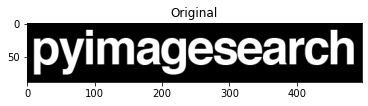

In [86]:
image = cv2.imread("image/pyimagesearch_logo.png")

imshow(image, "Original")

### convert image to grayscale

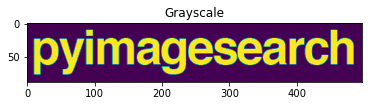

In [88]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray, "Grayscale")

### Erosion
Just like water rushing along a river bank erodes the soil, an erosion in an image “erodes” the foreground object and makes it smaller. Simply put, pixels near the boundary of an object in an image will be discarded, “eroding” it away.

Erosion works by defining a structuring element and then sliding this structuring element from left-to-right and top-to-bottom across the input image.

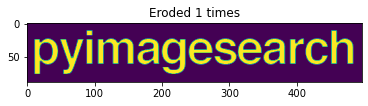

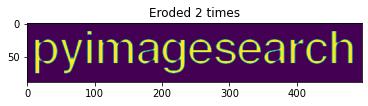

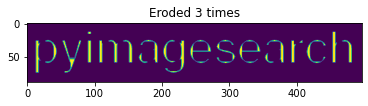

In [92]:
for i in range(1, 4):
    eroded = cv2.erode(gray.copy(), None, iterations=i)
    imshow(eroded, f"Eroded {i} times")

### Dilation

The opposite of an erosion is a dilation. Just like an erosion will eat away at the foreground pixels, a dilation will grow the foreground pixels.

Dilations increase the size of foreground object and are especially useful for joining broken parts of an image together.

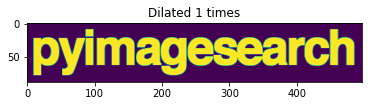

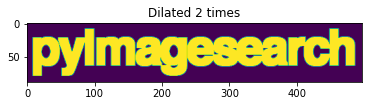

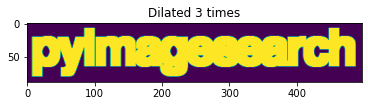

In [93]:
for i in range(1, 4):
    dilated = cv2.dilate(gray.copy(), None, iterations=i)
    imshow(dilated, f"Dilated {i} times")

### Opening

An opening is an erosion followed by a dilation.

Performing an opening operation allows us to remove small blobs from an image: first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

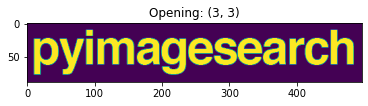

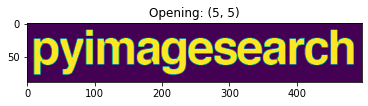

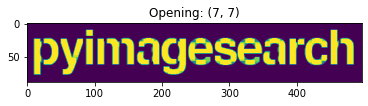

In [95]:
kernelSizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels and apply an "opening" operation to the image
for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    imshow(opening, f"Opening: ({kernelSize[0]}, {kernelSize[1]})")

### Closing
The exact opposite to an opening would be a closing. A closing is a dilation followed by an erosion.

As the name suggests, a closing is used to close holes inside of objects or for connecting components together.### Opening

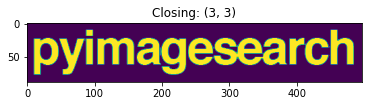

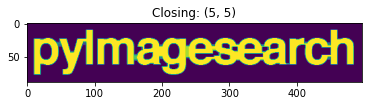

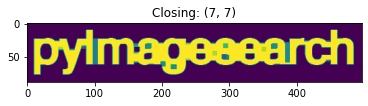

In [97]:
for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    imshow(closing, f"Closing: ({kernelSize[0]}, {kernelSize[1]})")

### Morphological Gradient

A morphological gradient is the difference between the dilation and erosion. It is useful for determining the outline of a particular object of an image

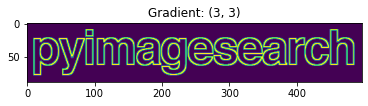

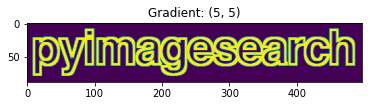

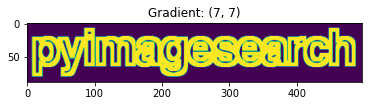

In [98]:
for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    imshow(gradient, f"Gradient: ({kernelSize[0]}, {kernelSize[1]})")

### Top Hat/White Hat

A top hat (also known as a white hat) morphological operation is the difference between the original (grayscale/single channel) input image and the opening.

A top hat operation is used to reveal bright regions of an image on dark backgrounds.

### load the image and convert it to grayscale

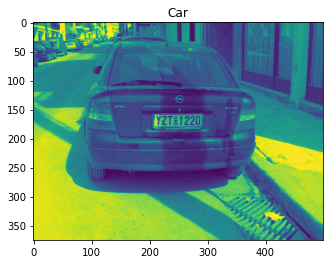

In [106]:
image = cv2.imread("image/car.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow(gray, "Car")

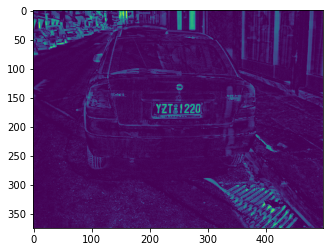

In [109]:
# construct a rectangular kernel and apply a blackhat operation which
# enables us to find dark regions on a light background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

imshow(blackhat)

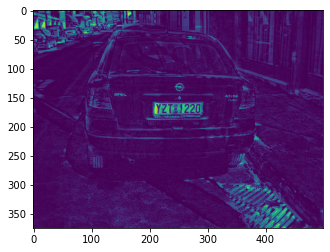

In [110]:
# similarly, a tophat (also called a "whitehat") operation will enable
# us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

imshow(tophat)